# WeatherPy
----
## Insights and conclusions

1. We can see a **strong negative correlation** between latitude and temperature, explaining only for northern hemisphere, the greater the latitude, the lesser temperature will be. In the other hand, we see a **positive correlation** for southern hemisphere were we can explain, the greater the latitude, the greater the temperature.


2. Referring to the other variables Humidity, Cloudiness and Wind Speed, **the data does not show any correlation** between these variables and the latitude of the city.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
latitudes=[]
longitudes=[]

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        latitudes.append(lat_lng[0])
        longitudes.append(lat_lng[1])
        
print(len(cities))
# cities=cities[:20]
# pd.DataFrame(lat_lngs)


633


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
city_df=[]

index=1
counter=1
print('Beginning Data Retrieval     ')
print('-----------------------------')

for city in cities:

    url=f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial'
    response=requests.get(url).json()

    if index>50: 
        counter+=1
        index=0
        
    try:
        city_name=response["name"]
        index+=1
        
        city_df.append({'City':response["name"],
             'Lat':response['coord']['lat'],
             'Lng':response['coord']['lon'],
             'Max Temp':response['main']['temp_max'],
             'Humidity': response['main']['humidity'],
             'Cloudiness':response['clouds']['all'],
             'Wind Speed':response['wind']['speed'],
              'Country':response['sys']['country'],
              'Date':response['dt']})
        
        print(f'Processing Record {index} of Set {counter} | {city_name} ')
        
    except (KeyError, IndexError):
        print("City not found. Skipping...")
    
    
print('-----------------------------')
print('Data Retrieval Complete      ')
print('-----------------------------')


Beginning Data Retrieval     
-----------------------------
Processing Record 2 of Set 1 | Punta Arenas 
Processing Record 3 of Set 1 | Buena Vista 
Processing Record 4 of Set 1 | Saskylakh 
Processing Record 5 of Set 1 | San Patricio 
Processing Record 6 of Set 1 | Qaanaaq 
Processing Record 7 of Set 1 | George Town 
Processing Record 8 of Set 1 | Rikitea 
Processing Record 9 of Set 1 | Saint-Philippe 
Processing Record 10 of Set 1 | Akdepe 
Processing Record 11 of Set 1 | Carnarvon 
Processing Record 12 of Set 1 | Saint George 
Processing Record 13 of Set 1 | Butaritari 
Processing Record 14 of Set 1 | Poum 
City not found. Skipping...
Processing Record 15 of Set 1 | Iqaluit 
Processing Record 16 of Set 1 | Illela 
Processing Record 17 of Set 1 | Busselton 
Processing Record 18 of Set 1 | Magistral'nyy 
Processing Record 19 of Set 1 | Sobolevo 
Processing Record 20 of Set 1 | Mataura 
Processing Record 21 of Set 1 | Cape Town 
City not found. Skipping...
Processing Record 22 of Set 1

Processing Record 30 of Set 4 | Karoi 
Processing Record 31 of Set 4 | Palmer 
Processing Record 32 of Set 4 | Xam Nua 
Processing Record 33 of Set 4 | Baní 
Processing Record 34 of Set 4 | San Luis 
Processing Record 35 of Set 4 | Mmabatho 
Processing Record 36 of Set 4 | Oytal 
Processing Record 37 of Set 4 | Burgersdorp 
Processing Record 38 of Set 4 | Tura 
Processing Record 39 of Set 4 | Kasangulu 
Processing Record 40 of Set 4 | Kahului 
City not found. Skipping...
Processing Record 41 of Set 4 | Atuona 
Processing Record 42 of Set 4 | Muhafazat Lahij 
Processing Record 43 of Set 4 | Ponta do Sol 
Processing Record 44 of Set 4 | Cabo San Lucas 
Processing Record 45 of Set 4 | Tazovsky 
Processing Record 46 of Set 4 | Muriti 
Processing Record 47 of Set 4 | Yuncheng 
Processing Record 48 of Set 4 | Beaufort 
Processing Record 49 of Set 4 | Poplar Bluff 
Processing Record 50 of Set 4 | Maniitsoq 
Processing Record 51 of Set 4 | Ceglie Messapica 
Processing Record 1 of Set 5 | Hong 

Processing Record 6 of Set 8 | Palu 
Processing Record 7 of Set 8 | Médéa 
Processing Record 8 of Set 8 | Valparaíso 
Processing Record 9 of Set 8 | Yook 
Processing Record 10 of Set 8 | Cherskiy 
Processing Record 11 of Set 8 | Hatfield 
Processing Record 12 of Set 8 | Daru 
Processing Record 13 of Set 8 | Kavaratti 
Processing Record 14 of Set 8 | Puerto Escondido 
Processing Record 15 of Set 8 | Hamilton 
Processing Record 16 of Set 8 | Simpang 
Processing Record 17 of Set 8 | Morehead 
Processing Record 18 of Set 8 | Dubrovka 
Processing Record 19 of Set 8 | Panama City 
Processing Record 20 of Set 8 | Gwadar 
Processing Record 21 of Set 8 | Ikongo 
Processing Record 22 of Set 8 | Kholodnyy 
Processing Record 23 of Set 8 | Omsukchan 
Processing Record 24 of Set 8 | Glace Bay 
Processing Record 25 of Set 8 | Tabou 
Processing Record 26 of Set 8 | Hambantota 
Processing Record 27 of Set 8 | Vanavara 
Processing Record 28 of Set 8 | Salalah 
City not found. Skipping...
Processing Reco

Processing Record 32 of Set 11 | Rio Claro 
Processing Record 33 of Set 11 | Zgierz 
Processing Record 34 of Set 11 | Moyale 
Processing Record 35 of Set 11 | Innisfail 
Processing Record 36 of Set 11 | Guerrero Negro 
Processing Record 37 of Set 11 | Byron Bay 
Processing Record 38 of Set 11 | Talnakh 
Processing Record 39 of Set 11 | Kushiro 
Processing Record 40 of Set 11 | Yar-Sale 
Processing Record 41 of Set 11 | Keffi 
Processing Record 42 of Set 11 | Itoman 
Processing Record 43 of Set 11 | Salinópolis 
Processing Record 44 of Set 11 | Merke 
Processing Record 45 of Set 11 | Oktyabr'skoye 
City not found. Skipping...
Processing Record 46 of Set 11 | Okato 
Processing Record 47 of Set 11 | Manono 
Processing Record 48 of Set 11 | Davila 
Processing Record 49 of Set 11 | Iglesias 
Processing Record 50 of Set 11 | Guanare 
Processing Record 51 of Set 11 | Laredo 
Processing Record 1 of Set 12 | San Jose 
Processing Record 2 of Set 12 | Burnie 
Processing Record 3 of Set 12 | Bilti

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
city_df=pd.DataFrame(city_df)

city_df.to_csv('../Resources/City Data.csv')
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,46.40,93,90,2.30,CL,1619455831
1,Buena Vista,43.4203,-83.8986,42.80,56,90,8.05,US,1619456079
2,Saskylakh,71.9167,114.0833,-7.19,100,85,4.92,RU,1619456080
3,San Patricio,28.0170,-97.5169,82.99,69,75,18.41,US,1619456080
4,Qaanaaq,77.4840,-69.3632,37.56,74,72,6.76,GL,1619456081


In [13]:
city_df.describe().round(2)

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,579.00,579.00,579.00,579.00,579.00,579.00,5.790000e+02
mean,22.61,21.41,60.53,67.39,54.11,7.92,1.619456e+09
std,32.73,89.19,21.52,22.87,37.30,5.31,9.740000e+01
min,-54.80,-175.20,-7.19,5.00,0.00,0.47,1.619456e+09
25%,-3.68,-57.87,46.00,53.00,20.00,3.87,1.619456e+09
50%,29.03,25.84,63.43,71.00,59.00,6.91,1.619456e+09
75%,50.49,102.39,77.16,87.00,90.00,10.36,1.619456e+09
max,78.22,179.32,113.00,100.00,100.00,35.68,1.619457e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
#  Get the indices of cities that have humidity over 100%.
over_humidity = city_df[city_df['Humidity']>100].index
over_humidity

Int64Index([], dtype='int64')

In [15]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data=city_df.drop(over_humidity , inplace=False)

clean_city_data.head().round(2)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.15,-70.92,46.40,93,90,2.30,CL,1619455831
1,Buena Vista,43.42,-83.90,42.80,56,90,8.05,US,1619456079
2,Saskylakh,71.92,114.08,-7.19,100,85,4.92,RU,1619456080
3,San Patricio,28.02,-97.52,82.99,69,75,18.41,US,1619456080
4,Qaanaaq,77.48,-69.36,37.56,74,72,6.76,GL,1619456081


In [16]:
clean_city_data[['Lat','Max Temp']] = np.int64(clean_city_data[['Lat','Max Temp']])
# clean_city_data.dtypes

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

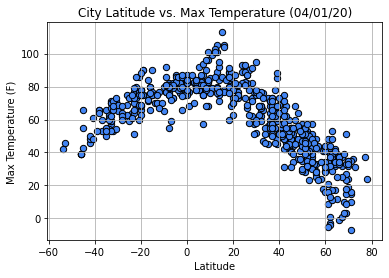

In [17]:
clean_city_data.plot.scatter(x="Lat", y="Max Temp", s=40,color= '#4285F4' , edgecolors = "black")

# Format and labels
plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True, which="major",axis="both",linestyle="-")  
plt.savefig("Graphs/LatVsTemp.png")
plt.show()

## Latitude vs. Humidity Plot

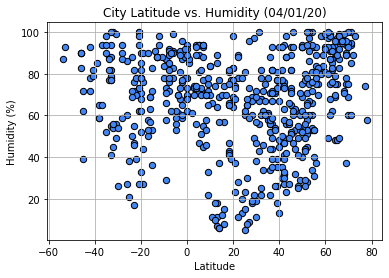

In [18]:
clean_city_data.plot.scatter(x="Lat", y="Humidity", s=40,color= '#4285F4' , edgecolors = "black")

# Format and labels
plt.title("City Latitude vs. Humidity (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True, which="major",axis="both",linestyle="-")  
plt.savefig("Graphs/LatVsHum.png")
plt.show()

## Latitude vs. Cloudiness Plot

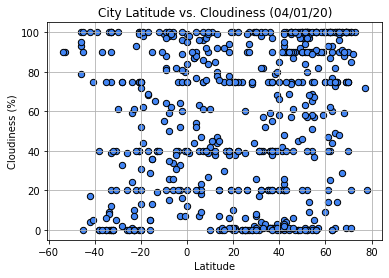

In [19]:
clean_city_data.plot.scatter(x="Lat", y="Cloudiness", s=40,color= '#4285F4' , edgecolors = "black")

# Format and labels
plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True, which="major",axis="both",linestyle="-")  
plt.savefig("Graphs/LatVsCloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

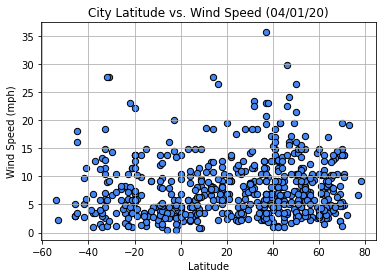

In [20]:
clean_city_data.plot.scatter(x="Lat", y="Wind Speed", s=40,color= '#4285F4' , edgecolors = "black")

# Format and labels
plt.title("City Latitude vs. Wind Speed (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True, which="major",axis="both",linestyle="-")  
plt.savefig("Graphs/LatVsWind.png")
plt.show()

## Linear Regression

In [21]:
northern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] > 0]
southern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient is -0.87
The r-value is: 0.7516102714254506


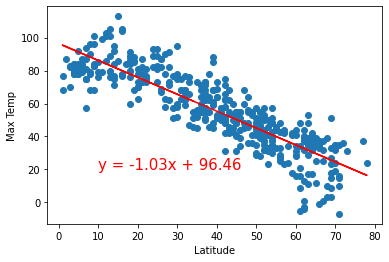

<Figure size 432x288 with 0 Axes>

In [22]:
# Linear regression model and correlation coefficient 

x_axis = northern_hemisphere["Lat"]
y_axis = northern_hemisphere["Max Temp"]

corr=round(st.pearsonr(x_axis,y_axis)[0],2)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

print(f"The correlation coefficient is {corr}")
print(f"The r-value is: {rvalue**2}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

plt.savefig("Graphs/CorrelationNorth(LatVsTemp).png")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient is 0.77
The r-value is: 0.5863155321593495


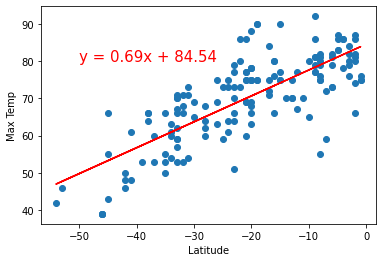

<Figure size 432x288 with 0 Axes>

In [23]:
# Linear regression model and correlation coefficient 

x_axis = southern_hemisphere["Lat"]
y_axis = southern_hemisphere["Max Temp"]

corr=round(st.pearsonr(x_axis,y_axis)[0],2)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

print(f"The correlation coefficient is {corr}")
print(f"The r-value is: {rvalue**2}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

plt.savefig("Graphs/CorrelationSouth(LatVsTemp).png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient is 0.28
The r-value is: 0.08049089094002508


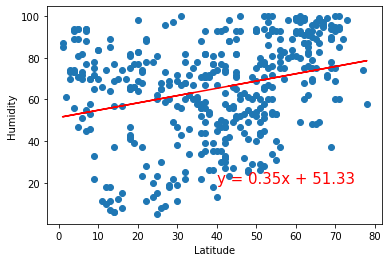

<Figure size 432x288 with 0 Axes>

In [24]:
# Linear regression model and correlation coefficient 

x_axis = northern_hemisphere["Lat"]
y_axis = northern_hemisphere["Humidity"]

corr=round(st.pearsonr(x_axis,y_axis)[0],2)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

print(f"The correlation coefficient is {corr}")
print(f"The r-value is: {rvalue**2}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

plt.savefig("Graphs/CorrelationNorth(LatVsHumidity).png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient is 0.02
The r-value is: 0.00023014630210832656


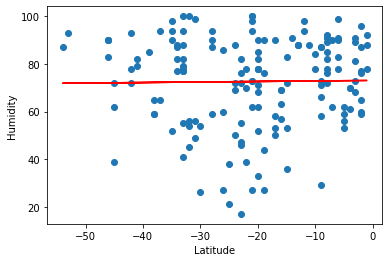

<Figure size 432x288 with 0 Axes>

In [25]:
# Linear regression model and correlation coefficient 

x_axis = southern_hemisphere["Lat"]
y_axis = southern_hemisphere["Humidity"]

corr=round(st.pearsonr(x_axis,y_axis)[0],2)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

print(f"The correlation coefficient is {corr}")
print(f"The r-value is: {rvalue**2}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

plt.savefig("Graphs/CorrelationSouth(LatVsHumidity).png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient is 0.21
The r-value is: 0.04532222632341814


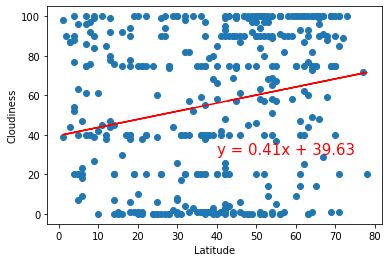

<Figure size 432x288 with 0 Axes>

In [26]:
# Linear regression model and correlation coefficient 

x_axis = northern_hemisphere["Lat"]
y_axis = northern_hemisphere["Cloudiness"]

corr=round(st.pearsonr(x_axis,y_axis)[0],2)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

print(f"The correlation coefficient is {corr}")
print(f"The r-value is: {rvalue**2}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

plt.savefig("Graphs/CorrelationNorth(LatVsCloud).png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient is 0.09
The r-value is: 0.0074841221541478075


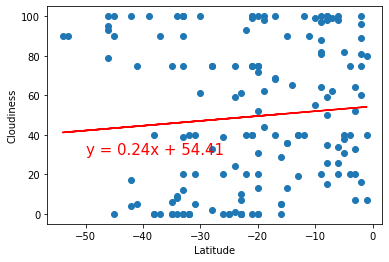

<Figure size 432x288 with 0 Axes>

In [27]:
# Linear regression model and correlation coefficient 

x_axis = southern_hemisphere["Lat"]
y_axis = southern_hemisphere["Cloudiness"]

corr=round(st.pearsonr(x_axis,y_axis)[0],2)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

print(f"The correlation coefficient is {corr}")
print(f"The r-value is: {rvalue**2}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

plt.savefig("Graphs/CorrelationSouth(LatVsCloud).png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient is 0.04
The r-value is: 0.0014323303588098405


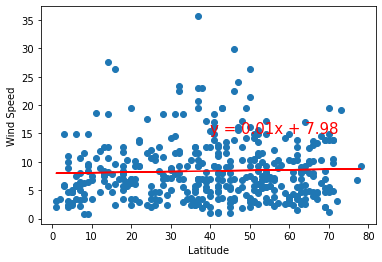

<Figure size 432x288 with 0 Axes>

In [28]:
# Linear regression model and correlation coefficient 

x_axis = northern_hemisphere["Lat"]
y_axis = northern_hemisphere["Wind Speed"]

corr=round(st.pearsonr(x_axis,y_axis)[0],2)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

print(f"The correlation coefficient is {corr}")
print(f"The r-value is: {rvalue**2}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(40,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

plt.savefig("Graphs/CorrelationNorth(LatVsWind).png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient is -0.09
The r-value is: 0.00894365531123204


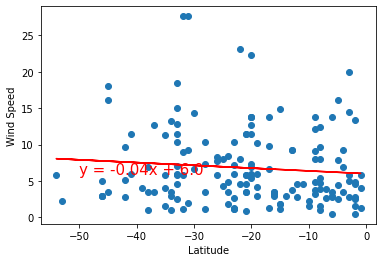

<Figure size 432x288 with 0 Axes>

In [29]:
# Linear regression model and correlation coefficient 

x_axis = southern_hemisphere["Lat"]
y_axis = southern_hemisphere["Wind Speed"]

corr=round(st.pearsonr(x_axis,y_axis)[0],2)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

print(f"The correlation coefficient is {corr}")
print(f"The r-value is: {rvalue**2}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,6),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

plt.savefig("Graphs/CorrelationNorth(LatVsWind).png")

In [30]:
clean_city_data.to_csv('../Resources/Clean City Data.csv')

In [31]:
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53,-70.9167,46,93,90,2.30,CL,1619455831
1,Buena Vista,43,-83.8986,42,56,90,8.05,US,1619456079
2,Saskylakh,71,114.0833,-7,100,85,4.92,RU,1619456080
3,San Patricio,28,-97.5169,82,69,75,18.41,US,1619456080
4,Qaanaaq,77,-69.3632,37,74,72,6.76,GL,1619456081
...,...,...,...,...,...,...,...,...,...
574,Taksimo,56,114.8794,28,81,100,5.08,RU,1619456316
575,College Place,46,-118.3883,55,62,1,13.80,US,1619456316
576,Mapiripán,2,-72.1256,87,61,90,3.38,CO,1619456317
577,Siavonga,-16,28.7088,76,63,0,2.93,ZM,1619456317
